# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer
from model_evaluator import DataSource, DataPredSelection

# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Fine tuning last 2 blocks (block5_conv3 and block5_pool) of VGG16 for 10 epochs and training for 200 epochs',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', 'fine-tuning', '200 epochs'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 200,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 42803
Process ID: 55659
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Fine tuning last 2 blocks (block5_conv3 and '
                               'block5_pool) of VGG16 for 10 epochs and '
                               'training for 200 epochs',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         'fine-tuning',
                         '200 epochs']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f9f69cf9280>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


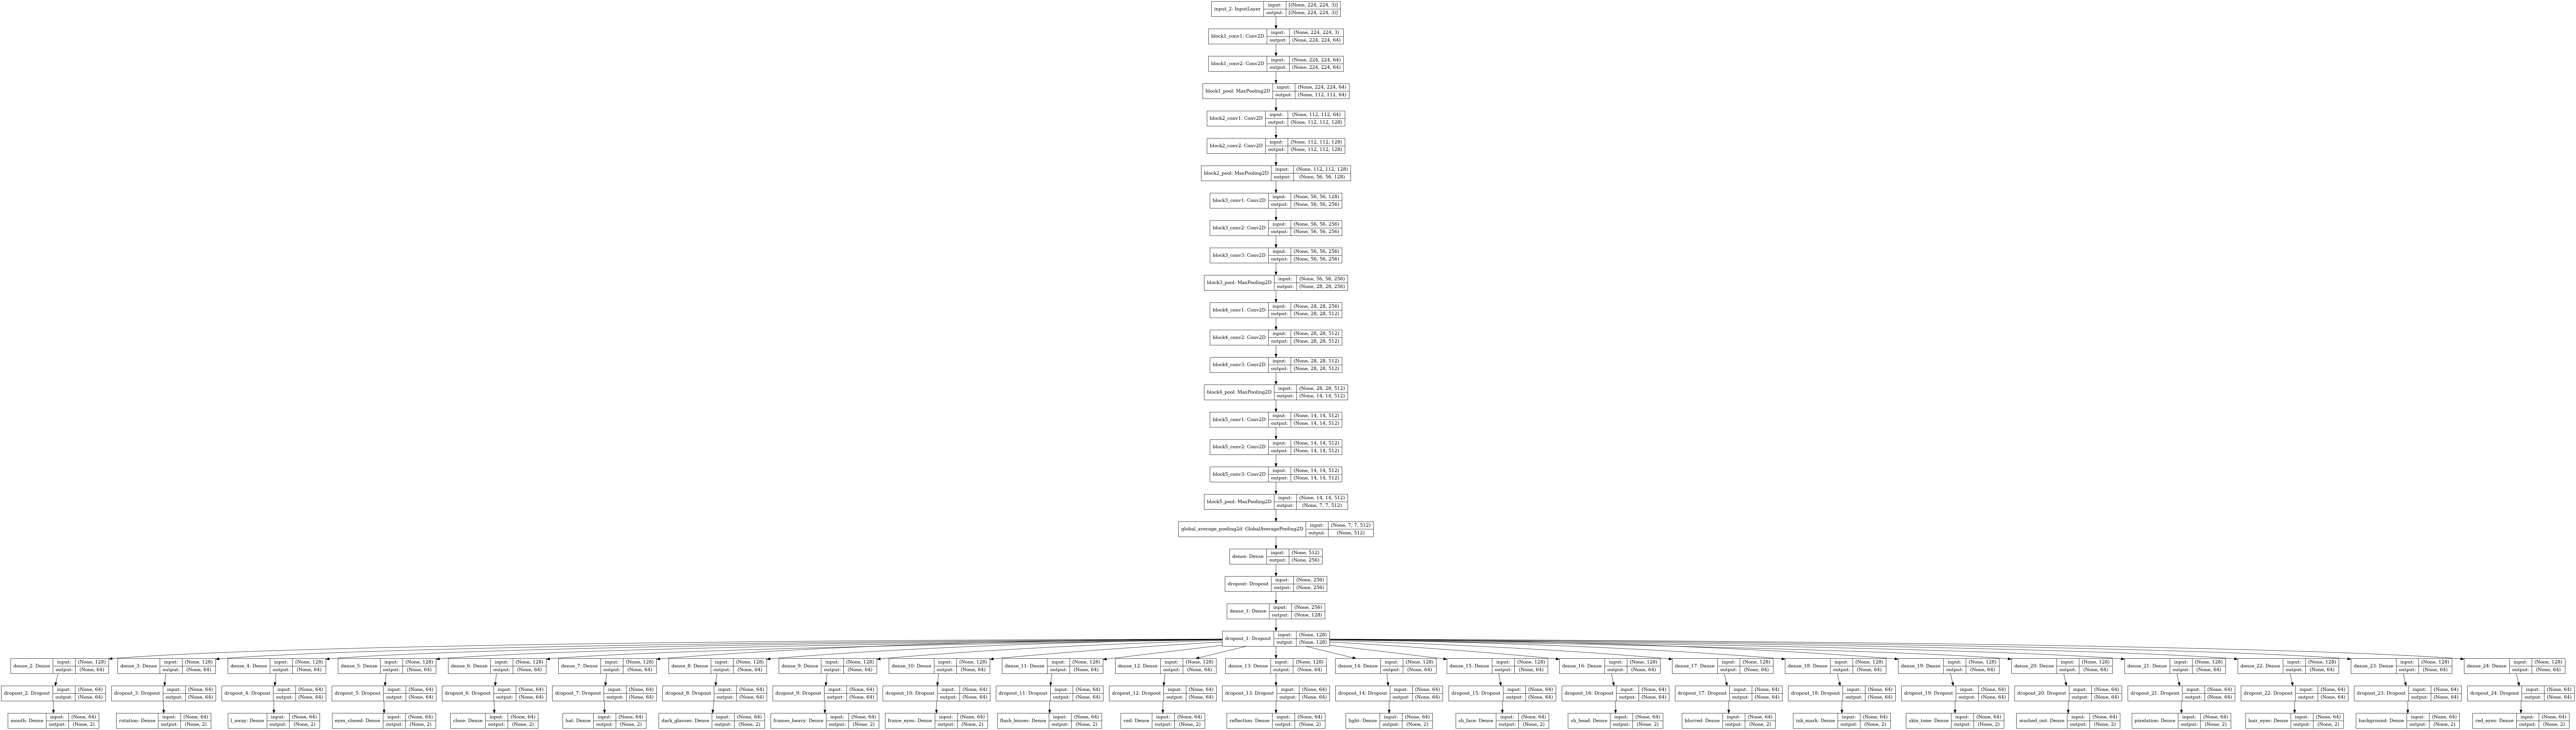

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model.png")

In [11]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model - Fine-Tuning

In [12]:
runner.train_model(fine_tuned=True, n_epochs=10)

-------------------- train model -------------------
Training VGG16 network
 .. Fine tuning base model...
 .. Base model non trainable layers: ['input_2', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2']
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
___________________________________________________________________________________

77/77 [==============================] - 371s 5s/step - loss: 1.2891 - mouth_loss: 0.6654 - rotation_loss: 0.6434 - l_away_loss: 0.6754 - eyes_closed_loss: 0.6212 - close_loss: 0.3445 - hat_loss: 0.5645 - dark_glasses_loss: 0.5316 - frames_heavy_loss: 0.3084 - frame_eyes_loss: 0.6682 - flash_lenses_loss: 0.6159 - veil_loss: 0.4852 - reflection_loss: 0.6929 - light_loss: 0.4865 - sh_face_loss: 0.6837 - sh_head_loss: 0.6840 - blurred_loss: 0.5333 - ink_mark_loss: 0.2966 - skin_tone_loss: 0.6929 - washed_out_loss: 0.3258 - pixelation_loss: 0.4679 - hair_eyes_loss: 0.5877 - background_loss: 0.6911 - red_eyes_loss: 0.6250 - mouth_accuracy: 0.7077 - rotation_accuracy: 0.7245 - l_away_accuracy: 0.6641 - eyes_closed_accuracy: 0.7558 - close_accuracy: 0.9249 - hat_accuracy: 0.8072 - dark_glasses_accuracy: 0.8327 - frames_heavy_accuracy: 0.9339 - frame_eyes_accuracy: 0.6899 - flash_lenses_accuracy: 0.7476 - veil_accuracy: 0.8813 - reflection_accuracy: 0.4940 - light_accuracy: 0.8629 - sh_face_ac

# Plots - Fine-Tuned

-------------------- draw training history -------------------


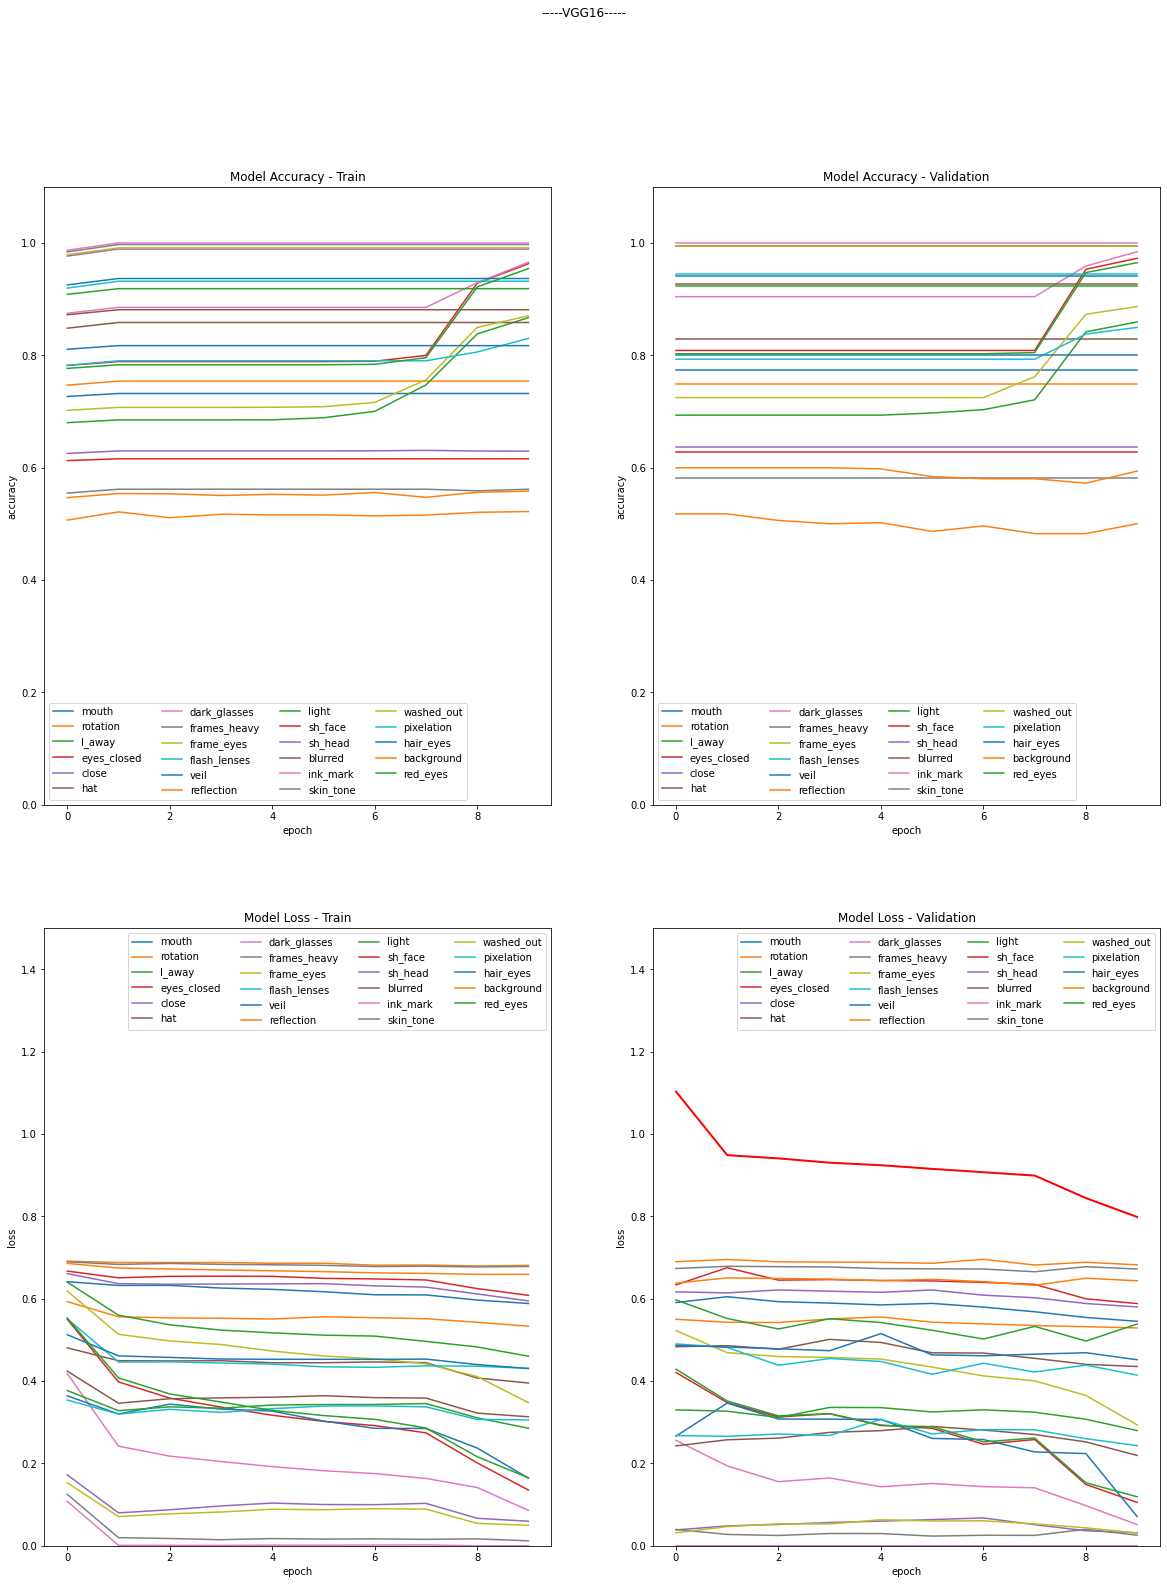

In [13]:
runner.draw_training_history()

# Load Best Model - Fine-Tuned

In [14]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model - Fine-Tuned

In [15]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Train Again Without Fine Tuning

In [16]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]

# Plots - New Train

-------------------- draw training history -------------------


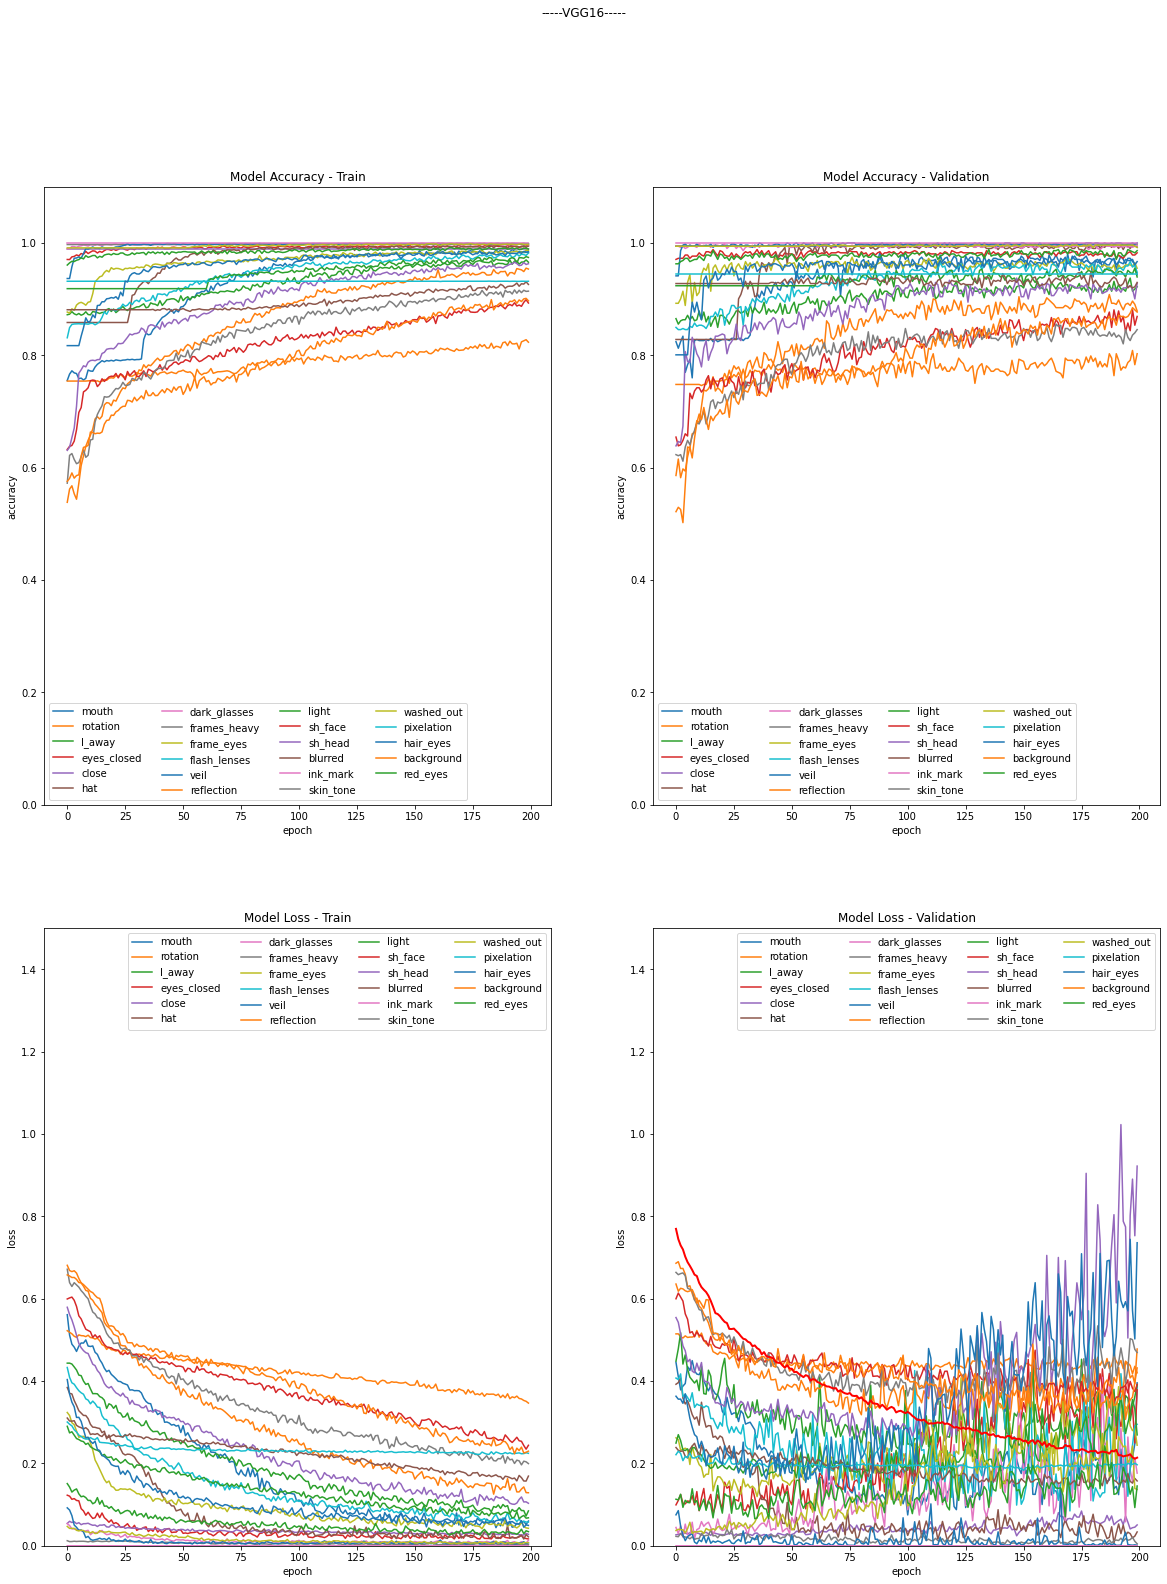

In [17]:
runner.draw_training_history()

# Load Best Model - New Train

In [18]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model - New Train

In [19]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 40s 4s/step
Prediction finished!
Requisite: MOUTH


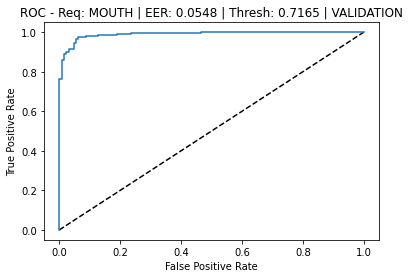

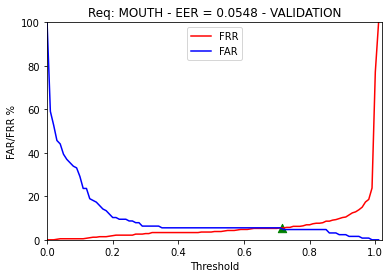

Requisite: MOUTH - EER_interp: 5.48% - Best Threshold: 0.7164888337964104
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.95      0.89       127
    COMPLIANT       0.99      0.95      0.96       420

     accuracy                           0.95       547
    macro avg       0.91      0.95      0.93       547
 weighted avg       0.95      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 4.72% | FRR: 5.48% | EER_mean: 5.1% | TP: 397 | TN: 121 | FP: 6 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 94.69999999999999%
---------------------------------------------------------
Requisite: ROTATION


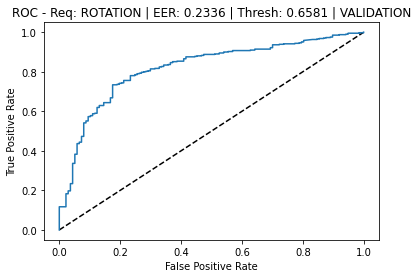

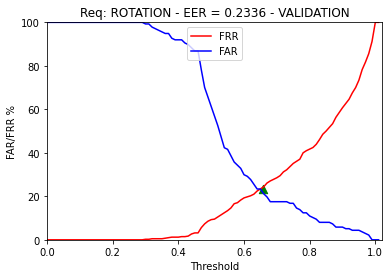

Requisite: ROTATION - EER_interp: 23.36% - Best Threshold: 0.6581185460091495
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.51      0.77      0.61       137
    COMPLIANT       0.91      0.76      0.82       410

     accuracy                           0.76       547
    macro avg       0.71      0.76      0.72       547
 weighted avg       0.81      0.76      0.77       547

Confusion matrix ----------------------------------------
FAR: 23.36% | FRR: 24.39% | EER_mean: 23.880000000000003% | TP: 310 | TN: 105 | FP: 32 | FN: 100
Accuracy ------------------------------------------------
Model Accuracy: 75.87%
---------------------------------------------------------
Requisite: L_AWAY


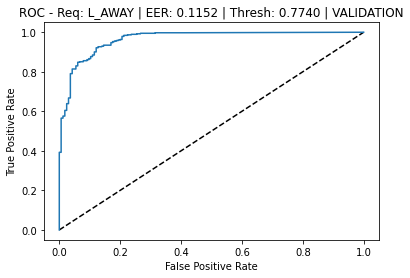

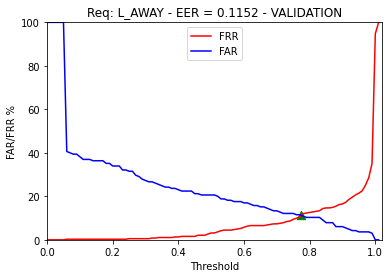

Requisite: L_AWAY - EER_interp: 11.52% - Best Threshold: 0.7739525437355397
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.88      0.82       165
    COMPLIANT       0.95      0.88      0.91       382

     accuracy                           0.88       547
    macro avg       0.86      0.88      0.87       547
 weighted avg       0.89      0.88      0.89       547

Confusion matrix ----------------------------------------
FAR: 11.52% | FRR: 11.52% | EER_mean: 11.52% | TP: 338 | TN: 146 | FP: 19 | FN: 44
Accuracy ------------------------------------------------
Model Accuracy: 88.48%
---------------------------------------------------------
Requisite: EYES_CLOSED


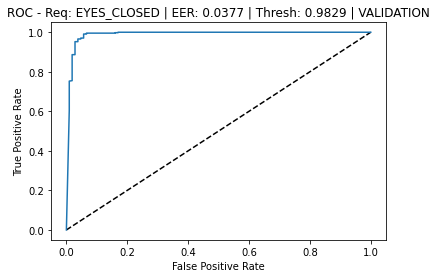

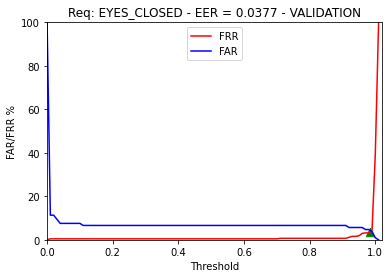

Requisite: EYES_CLOSED - EER_interp: 3.7699999999999996% - Best Threshold: 0.9829210638999685
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.96      0.91       106
    COMPLIANT       0.99      0.97      0.98       441

     accuracy                           0.97       547
    macro avg       0.93      0.96      0.95       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 3.7699999999999996% | FRR: 3.4000000000000004% | EER_mean: 3.58% | TP: 426 | TN: 102 | FP: 4 | FN: 15
Accuracy ------------------------------------------------
Model Accuracy: 96.53%
---------------------------------------------------------
Requisite: CLOSE


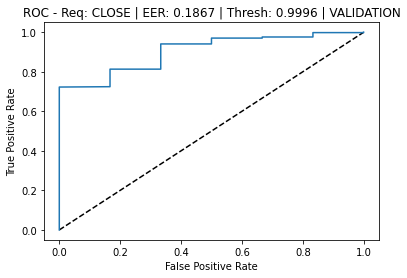

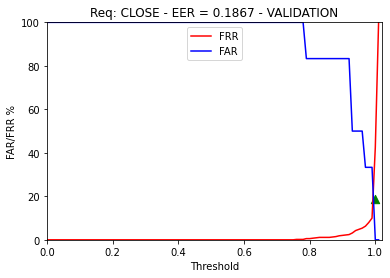

Requisite: CLOSE - EER_interp: 18.67% - Best Threshold: 0.9995583453372313
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.05      0.83      0.09         6
    COMPLIANT       1.00      0.81      0.90       541

     accuracy                           0.81       547
    macro avg       0.52      0.82      0.49       547
 weighted avg       0.99      0.81      0.89       547

Confusion matrix ----------------------------------------
FAR: 16.669999999999998% | FRR: 18.67% | EER_mean: 17.669999999999998% | TP: 440 | TN: 5 | FP: 1 | FN: 101
Accuracy ------------------------------------------------
Model Accuracy: 81.35%
---------------------------------------------------------
Requisite: HAT


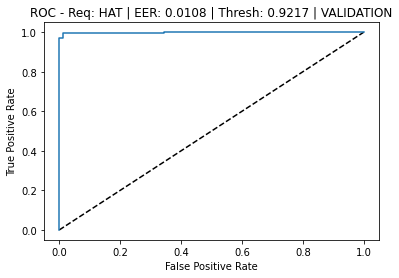

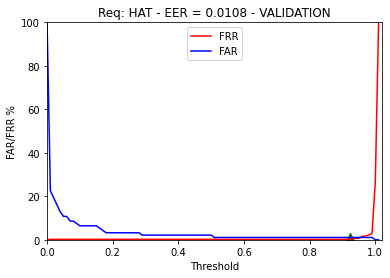

Requisite: HAT - EER_interp: 1.08% - Best Threshold: 0.9216742515547199
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.99      0.99      0.99        93
    COMPLIANT       1.00      1.00      1.00       454

     accuracy                           1.00       547
    macro avg       0.99      0.99      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 1.08% | FRR: 0.22% | EER_mean: 0.65% | TP: 453 | TN: 92 | FP: 1 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.63%
---------------------------------------------------------
Requisite: DARK_GLASSES


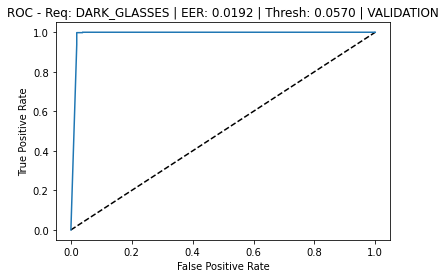

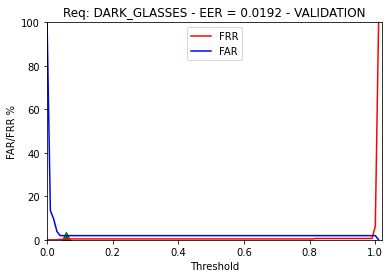

Requisite: DARK_GLASSES - EER_interp: 1.92% - Best Threshold: 0.05702073871970601
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.98      0.98      0.98        52
    COMPLIANT       1.00      1.00      1.00       495

     accuracy                           1.00       547
    macro avg       0.99      0.99      0.99       547
 weighted avg       1.00      1.00      1.00       547

Confusion matrix ----------------------------------------
FAR: 1.92% | FRR: 0.2% | EER_mean: 1.06% | TP: 494 | TN: 51 | FP: 1 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.63%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


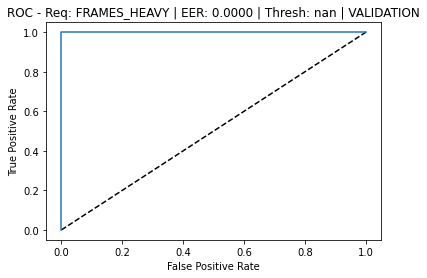

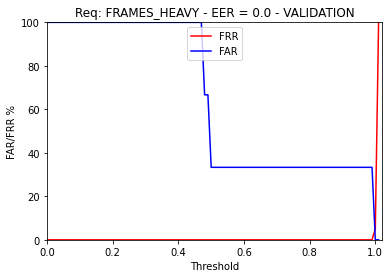

Requisite: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         3
    COMPLIANT       0.99      1.00      1.00       544

     accuracy                           0.99       547
    macro avg       0.50      0.50      0.50       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 544 | TN: 0 | FP: 3 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.45%
---------------------------------------------------------
Requisite: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


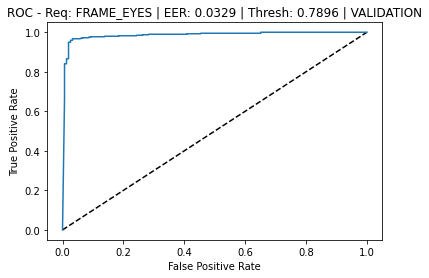

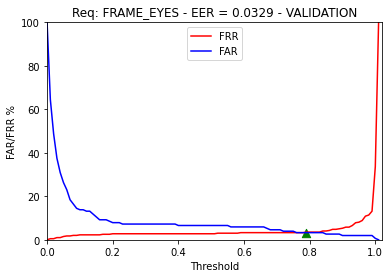

Requisite: FRAME_EYES - EER_interp: 3.29% - Best Threshold: 0.7895965714243366
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.97      0.94       152
    COMPLIANT       0.99      0.97      0.98       395

     accuracy                           0.97       547
    macro avg       0.95      0.97      0.96       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 3.29% | FRR: 3.29% | EER_mean: 3.29% | TP: 382 | TN: 147 | FP: 5 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 96.71%
---------------------------------------------------------
Requisite: FLASH_LENSES


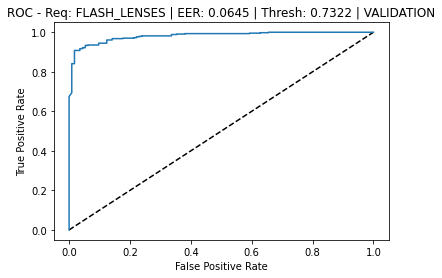

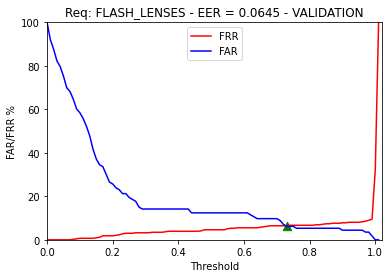

Requisite: FLASH_LENSES - EER_interp: 6.45% - Best Threshold: 0.7322133962185151
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.79      0.94      0.86       113
    COMPLIANT       0.98      0.94      0.96       434

     accuracy                           0.94       547
    macro avg       0.89      0.94      0.91       547
 weighted avg       0.94      0.94      0.94       547

Confusion matrix ----------------------------------------
FAR: 6.1899999999999995% | FRR: 6.45% | EER_mean: 6.32% | TP: 406 | TN: 106 | FP: 7 | FN: 28
Accuracy ------------------------------------------------
Model Accuracy: 93.60000000000001%
---------------------------------------------------------
Requisite: VEIL


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


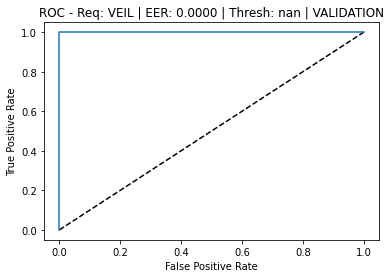

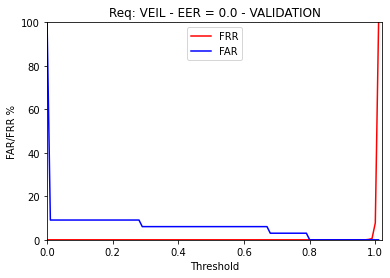

Requisite: VEIL - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00        33
    COMPLIANT       0.94      1.00      0.97       514

     accuracy                           0.94       547
    macro avg       0.47      0.50      0.48       547
 weighted avg       0.88      0.94      0.91       547

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 514 | TN: 0 | FP: 33 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 93.97%
---------------------------------------------------------
Requisite: REFLECTION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


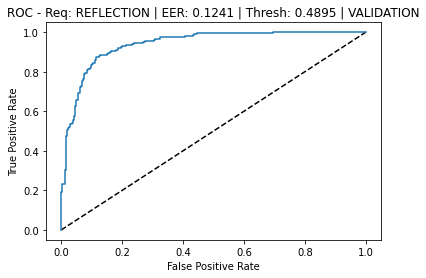

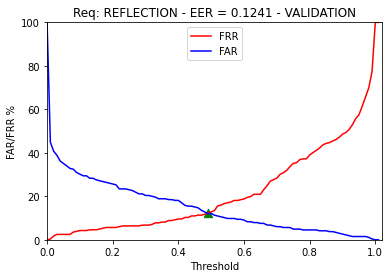

Requisite: REFLECTION - EER_interp: 12.41% - Best Threshold: 0.4894698423908114
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.88      0.87       265
    COMPLIANT       0.89      0.88      0.88       282

     accuracy                           0.88       547
    macro avg       0.88      0.88      0.88       547
 weighted avg       0.88      0.88      0.88       547

Confusion matrix ----------------------------------------
FAR: 12.08% | FRR: 12.41% | EER_mean: 12.24% | TP: 247 | TN: 233 | FP: 32 | FN: 35
Accuracy ------------------------------------------------
Model Accuracy: 87.75%
---------------------------------------------------------
Requisite: LIGHT


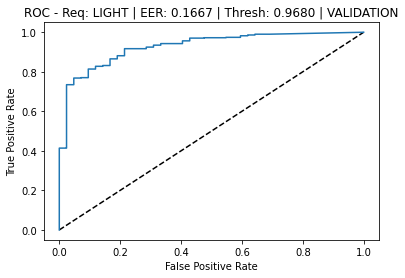

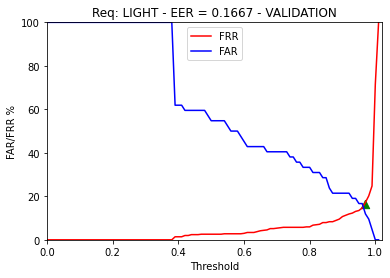

Requisite: LIGHT - EER_interp: 16.669999999999998% - Best Threshold: 0.9680377840995983
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.29      0.83      0.43        42
    COMPLIANT       0.98      0.83      0.90       505

     accuracy                           0.83       547
    macro avg       0.64      0.83      0.67       547
 weighted avg       0.93      0.83      0.87       547

Confusion matrix ----------------------------------------
FAR: 16.669999999999998% | FRR: 16.830000000000002% | EER_mean: 16.75% | TP: 420 | TN: 35 | FP: 7 | FN: 85
Accuracy ------------------------------------------------
Model Accuracy: 83.17999999999999%
---------------------------------------------------------
Requisite: SH_FACE


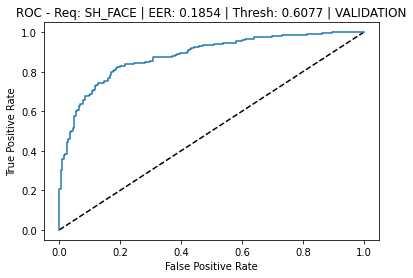

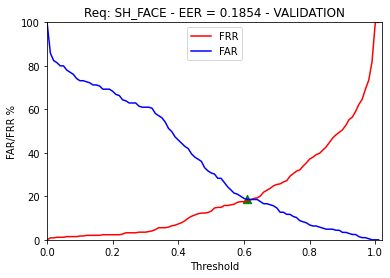

Requisite: SH_FACE - EER_interp: 18.54% - Best Threshold: 0.6077110767355212
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.73      0.81      0.77       205
    COMPLIANT       0.88      0.82      0.85       342

     accuracy                           0.82       547
    macro avg       0.81      0.82      0.81       547
 weighted avg       0.83      0.82      0.82       547

Confusion matrix ----------------------------------------
FAR: 18.54% | FRR: 17.84% | EER_mean: 18.19% | TP: 281 | TN: 167 | FP: 38 | FN: 61
Accuracy ------------------------------------------------
Model Accuracy: 81.89999999999999%
---------------------------------------------------------
Requisite: SH_HEAD


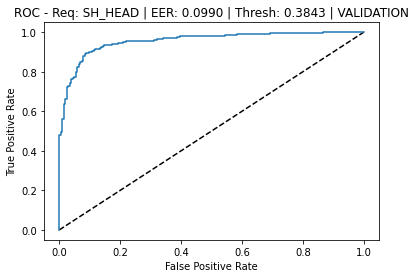

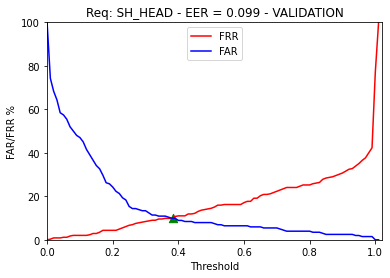

Requisite: SH_HEAD - EER_interp: 9.9% - Best Threshold: 0.3842500746236323
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.90      0.87       202
    COMPLIANT       0.94      0.90      0.92       345

     accuracy                           0.90       547
    macro avg       0.89      0.90      0.90       547
 weighted avg       0.90      0.90      0.90       547

Confusion matrix ----------------------------------------
FAR: 9.9% | FRR: 9.86% | EER_mean: 9.879999999999999% | TP: 311 | TN: 182 | FP: 20 | FN: 34
Accuracy ------------------------------------------------
Model Accuracy: 90.13%
---------------------------------------------------------
Requisite: BLURRED


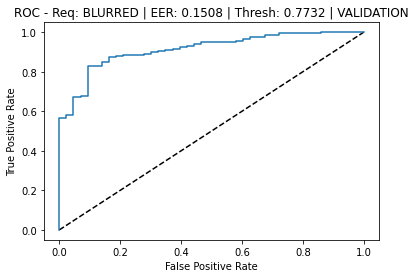

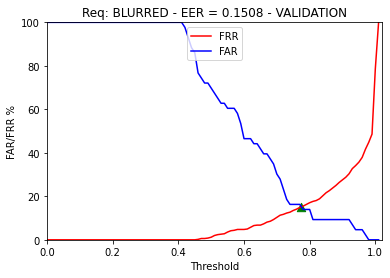

Requisite: BLURRED - EER_interp: 15.079999999999998% - Best Threshold: 0.7732120336048187
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.33      0.86      0.47        43
    COMPLIANT       0.99      0.85      0.91       504

     accuracy                           0.85       547
    macro avg       0.66      0.85      0.69       547
 weighted avg       0.93      0.85      0.88       547

Confusion matrix ----------------------------------------
FAR: 13.950000000000001% | FRR: 15.079999999999998% | EER_mean: 14.52% | TP: 428 | TN: 37 | FP: 6 | FN: 76
Accuracy ------------------------------------------------
Model Accuracy: 85.00999999999999%
---------------------------------------------------------
Requisite: SKIN_TONE


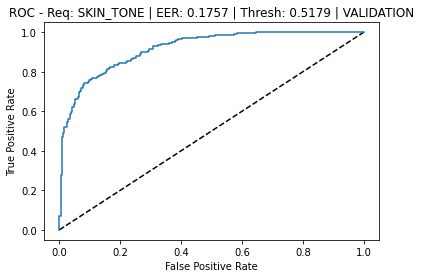

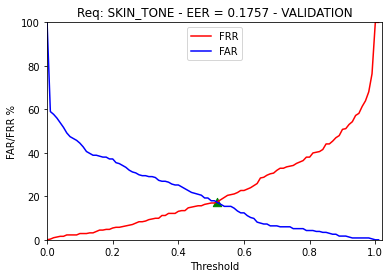

Requisite: SKIN_TONE - EER_interp: 17.57% - Best Threshold: 0.5178998819174517
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.82      0.80       234
    COMPLIANT       0.86      0.82      0.84       313

     accuracy                           0.82       547
    macro avg       0.82      0.82      0.82       547
 weighted avg       0.83      0.82      0.83       547

Confusion matrix ----------------------------------------
FAR: 17.52% | FRR: 17.57% | EER_mean: 17.54% | TP: 258 | TN: 193 | FP: 41 | FN: 55
Accuracy ------------------------------------------------
Model Accuracy: 82.45%
---------------------------------------------------------
Requisite: WASHED_OUT


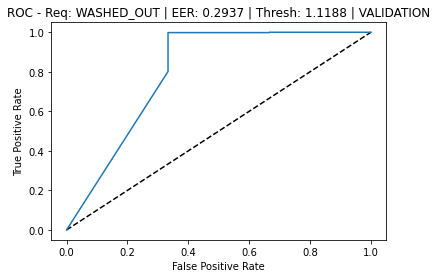

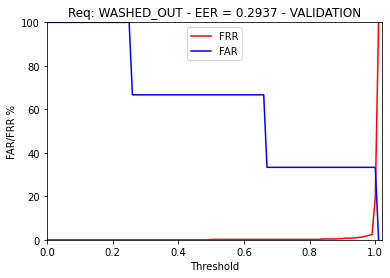

Requisite: WASHED_OUT - EER_interp: 29.37% - Best Threshold: 1.1187904967602593
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      1.00      0.01         3
    COMPLIANT       0.00      0.00      0.00       544

     accuracy                           0.01       547
    macro avg       0.00      0.50      0.01       547
 weighted avg       0.00      0.01      0.00       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 100.0% | EER_mean: 50.0% | TP: 0 | TN: 3 | FP: 0 | FN: 544
Accuracy ------------------------------------------------
Model Accuracy: 0.5499999999999999%
---------------------------------------------------------
Requisite: PIXELATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


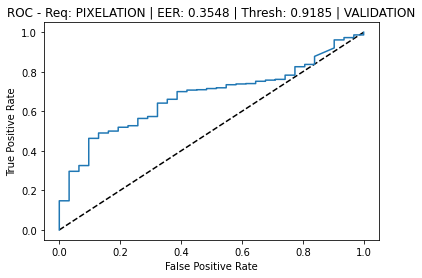

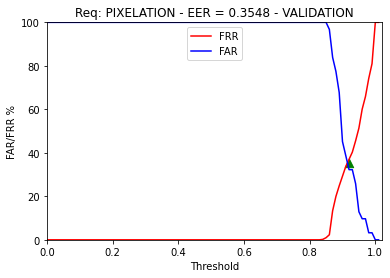

Requisite: PIXELATION - EER_interp: 35.480000000000004% - Best Threshold: 0.9184524416923558
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.10      0.65      0.17        31
    COMPLIANT       0.97      0.64      0.77       516

     accuracy                           0.64       547
    macro avg       0.53      0.64      0.47       547
 weighted avg       0.92      0.64      0.74       547

Confusion matrix ----------------------------------------
FAR: 35.480000000000004% | FRR: 35.85% | EER_mean: 35.66% | TP: 331 | TN: 20 | FP: 11 | FN: 185
Accuracy ------------------------------------------------
Model Accuracy: 64.17%
---------------------------------------------------------
Requisite: HAIR_EYES


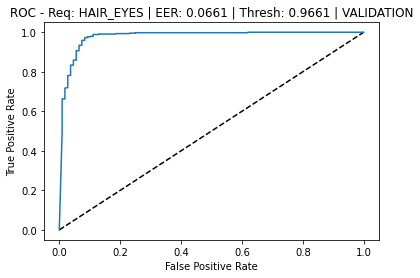

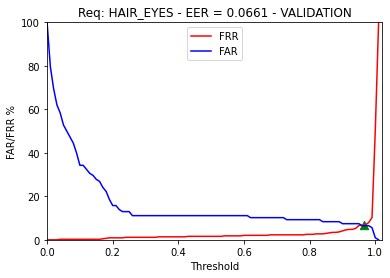

Requisite: HAIR_EYES - EER_interp: 6.61% - Best Threshold: 0.966056310370191
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.78      0.94      0.85       108
    COMPLIANT       0.98      0.93      0.96       439

     accuracy                           0.93       547
    macro avg       0.88      0.93      0.90       547
 weighted avg       0.94      0.93      0.94       547

Confusion matrix ----------------------------------------
FAR: 6.4799999999999995% | FRR: 6.61% | EER_mean: 6.550000000000001% | TP: 410 | TN: 101 | FP: 7 | FN: 29
Accuracy ------------------------------------------------
Model Accuracy: 93.42%
---------------------------------------------------------
Requisite: BACKGROUND


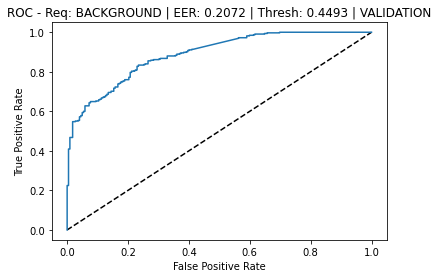

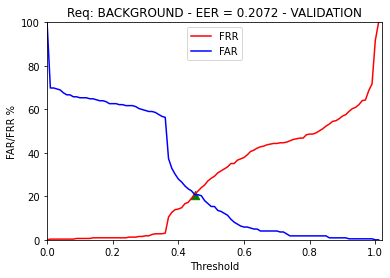

Requisite: BACKGROUND - EER_interp: 20.72% - Best Threshold: 0.44928160309789583
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.73      0.79      0.76       222
    COMPLIANT       0.85      0.80      0.82       325

     accuracy                           0.80       547
    macro avg       0.79      0.79      0.79       547
 weighted avg       0.80      0.80      0.80       547

Confusion matrix ----------------------------------------
FAR: 20.72% | FRR: 20.31% | EER_mean: 20.52% | TP: 259 | TN: 176 | FP: 46 | FN: 66
Accuracy ------------------------------------------------
Model Accuracy: 79.52%
---------------------------------------------------------
Requisite: RED_EYES


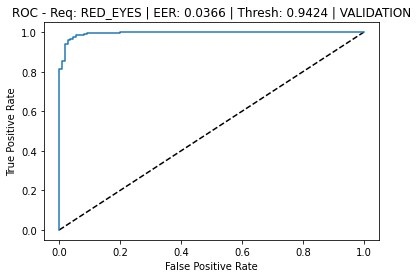

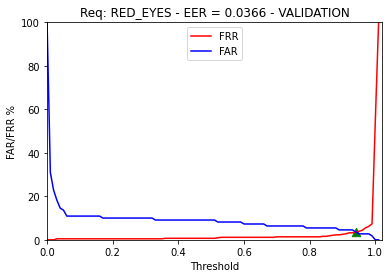

Requisite: RED_EYES - EER_interp: 3.66% - Best Threshold: 0.9423703915467251
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.96      0.91       110
    COMPLIANT       0.99      0.96      0.98       437

     accuracy                           0.96       547
    macro avg       0.93      0.96      0.95       547
 weighted avg       0.97      0.96      0.96       547

Confusion matrix ----------------------------------------
FAR: 3.64% | FRR: 3.66% | EER_mean: 3.65% | TP: 421 | TN: 106 | FP: 4 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 96.34%
---------------------------------------------------------


In [20]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
5/5 [==============================] - 29s 7s/step
Prediction finished!
Requisite: MOUTH


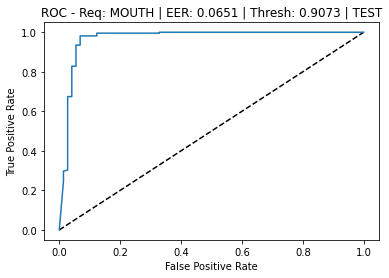

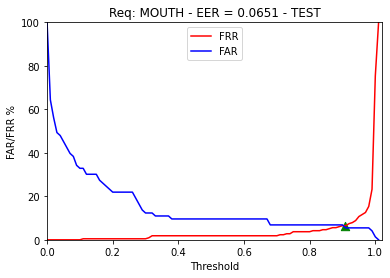

Requisite: MOUTH - EER_interp: 6.510000000000001% - Best Threshold: 0.9073483541954395
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.83      0.95      0.88        73
    COMPLIANT       0.98      0.93      0.96       215

     accuracy                           0.94       288
    macro avg       0.91      0.94      0.92       288
 weighted avg       0.94      0.94      0.94       288

Confusion matrix ----------------------------------------
FAR: 5.48% | FRR: 6.510000000000001% | EER_mean: 6.0% | TP: 201 | TN: 69 | FP: 4 | FN: 14
Accuracy ------------------------------------------------
Model Accuracy: 93.75%
---------------------------------------------------------
Requisite: ROTATION


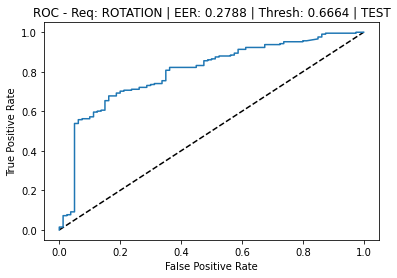

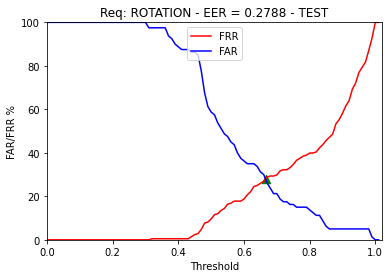

Requisite: ROTATION - EER_interp: 27.88% - Best Threshold: 0.6663600825346435
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.50      0.74      0.60        80
    COMPLIANT       0.88      0.72      0.79       208

     accuracy                           0.73       288
    macro avg       0.69      0.73      0.70       288
 weighted avg       0.77      0.73      0.74       288

Confusion matrix ----------------------------------------
FAR: 26.25% | FRR: 27.88% | EER_mean: 27.060000000000002% | TP: 150 | TN: 59 | FP: 21 | FN: 58
Accuracy ------------------------------------------------
Model Accuracy: 72.57000000000001%
---------------------------------------------------------
Requisite: L_AWAY


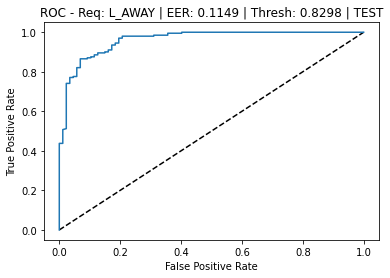

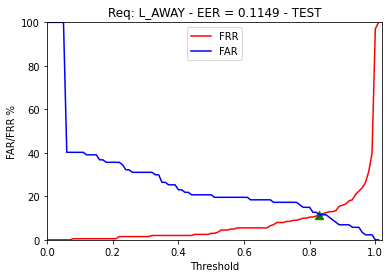

Requisite: L_AWAY - EER_interp: 11.49% - Best Threshold: 0.8297867774963271
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.89      0.82        87
    COMPLIANT       0.95      0.89      0.92       201

     accuracy                           0.89       288
    macro avg       0.86      0.89      0.87       288
 weighted avg       0.89      0.89      0.89       288

Confusion matrix ----------------------------------------
FAR: 11.49% | FRR: 11.44% | EER_mean: 11.459999999999999% | TP: 178 | TN: 77 | FP: 10 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 88.53999999999999%
---------------------------------------------------------
Requisite: EYES_CLOSED


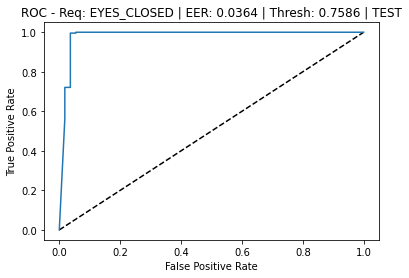

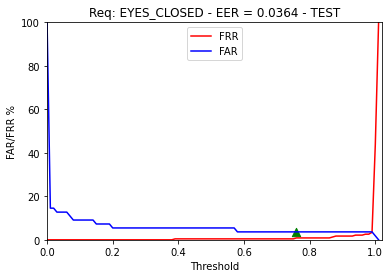

Requisite: EYES_CLOSED - EER_interp: 3.64% - Best Threshold: 0.7585687041164577
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.98      0.96      0.97        55
    COMPLIANT       0.99      1.00      0.99       233

     accuracy                           0.99       288
    macro avg       0.99      0.98      0.98       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 3.64% | FRR: 0.43% | EER_mean: 2.04% | TP: 232 | TN: 53 | FP: 2 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 98.96000000000001%
---------------------------------------------------------
Requisite: CLOSE


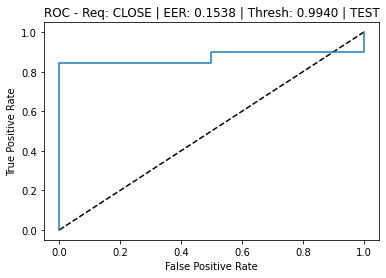

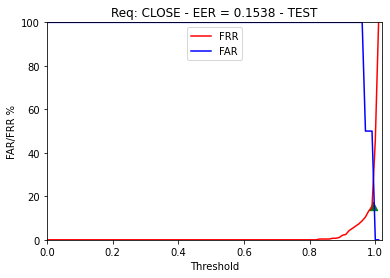

Requisite: CLOSE - EER_interp: 15.379999999999999% - Best Threshold: 0.9939620311443622
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.04      1.00      0.08         2
    COMPLIANT       1.00      0.85      0.92       286

     accuracy                           0.85       288
    macro avg       0.52      0.92      0.50       288
 weighted avg       0.99      0.85      0.91       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 15.379999999999999% | EER_mean: 7.6899999999999995% | TP: 242 | TN: 2 | FP: 0 | FN: 44
Accuracy ------------------------------------------------
Model Accuracy: 84.72%
---------------------------------------------------------
Requisite: HAT


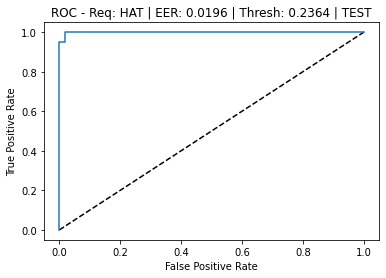

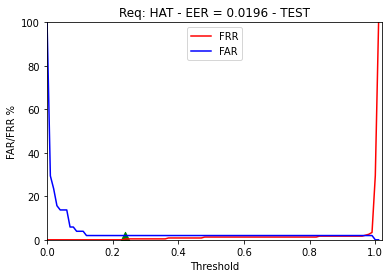

Requisite: HAT - EER_interp: 1.96% - Best Threshold: 0.2364113926883836
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.98      0.99        51
    COMPLIANT       1.00      1.00      1.00       237

     accuracy                           1.00       288
    macro avg       1.00      0.99      0.99       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: 1.96% | FRR: 0.0% | EER_mean: 0.98% | TP: 237 | TN: 50 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Requisite: DARK_GLASSES


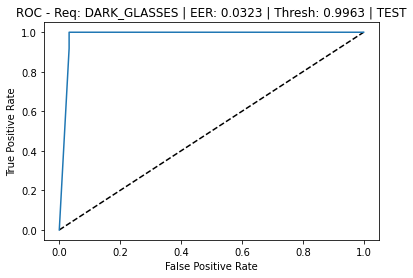

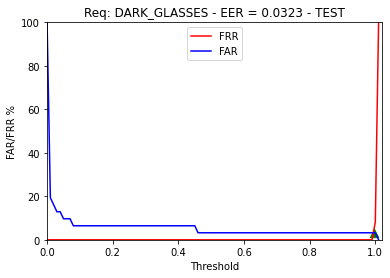

Requisite: DARK_GLASSES - EER_interp: 3.2300000000000004% - Best Threshold: 0.9963489770885522
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.97      0.98        31
    COMPLIANT       1.00      1.00      1.00       257

     accuracy                           1.00       288
    macro avg       1.00      0.98      0.99       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: 3.2300000000000004% | FRR: 0.0% | EER_mean: 1.6199999999999999% | TP: 257 | TN: 30 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


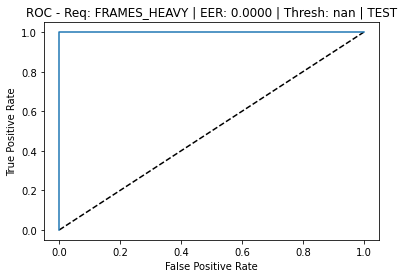

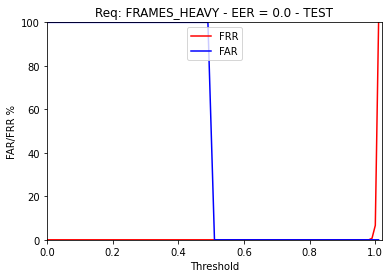

Requisite: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         2
    COMPLIANT       0.99      1.00      1.00       286

     accuracy                           0.99       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 286 | TN: 0 | FP: 2 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Requisite: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


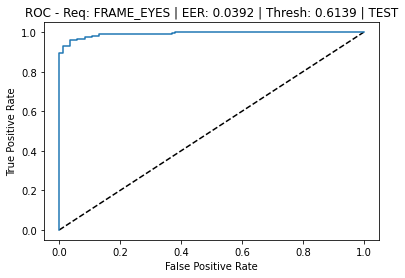

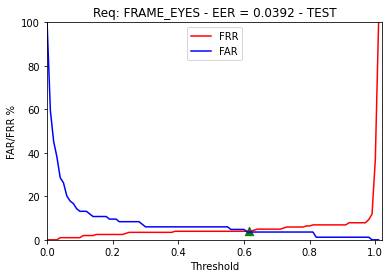

Requisite: FRAME_EYES - EER_interp: 3.92% - Best Threshold: 0.6138781011104583
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.91      0.96      0.94        84
    COMPLIANT       0.98      0.96      0.97       204

     accuracy                           0.96       288
    macro avg       0.95      0.96      0.95       288
 weighted avg       0.96      0.96      0.96       288

Confusion matrix ----------------------------------------
FAR: 3.5700000000000003% | FRR: 3.92% | EER_mean: 3.74% | TP: 196 | TN: 81 | FP: 3 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 96.17999999999999%
---------------------------------------------------------
Requisite: FLASH_LENSES


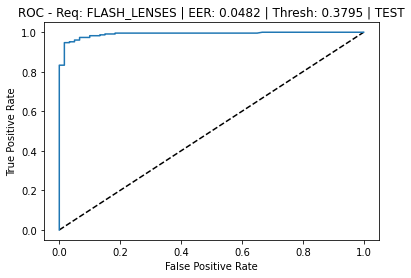

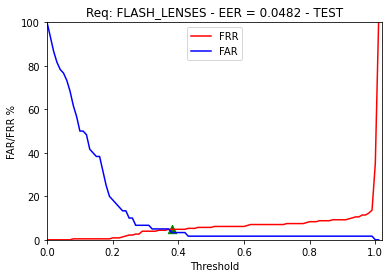

Requisite: FLASH_LENSES - EER_interp: 4.82% - Best Threshold: 0.3795296612538787
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.97      0.90        60
    COMPLIANT       0.99      0.95      0.97       228

     accuracy                           0.95       288
    macro avg       0.92      0.96      0.94       288
 weighted avg       0.96      0.95      0.96       288

Confusion matrix ----------------------------------------
FAR: 3.3300000000000005% | FRR: 4.82% | EER_mean: 4.08% | TP: 217 | TN: 58 | FP: 2 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 95.49%
---------------------------------------------------------
Requisite: VEIL


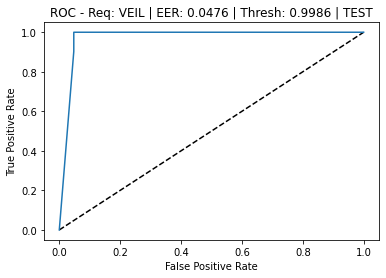

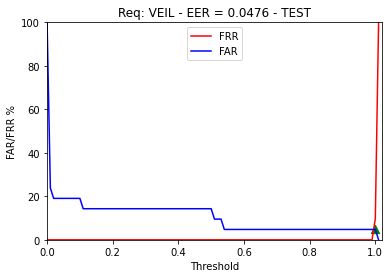

Requisite: VEIL - EER_interp: 4.760000000000001% - Best Threshold: 0.9986016154288679
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.95      0.98        21
    COMPLIANT       1.00      1.00      1.00       267

     accuracy                           1.00       288
    macro avg       1.00      0.98      0.99       288
 weighted avg       1.00      1.00      1.00       288

Confusion matrix ----------------------------------------
FAR: 4.760000000000001% | FRR: 0.0% | EER_mean: 2.3800000000000003% | TP: 267 | TN: 20 | FP: 1 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.65%
---------------------------------------------------------
Requisite: REFLECTION


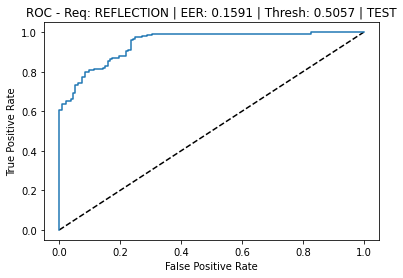

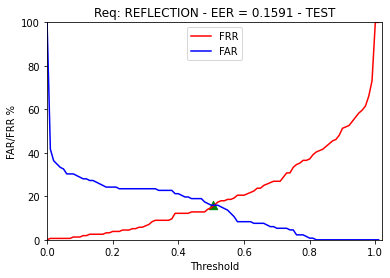

Requisite: REFLECTION - EER_interp: 15.909999999999998% - Best Threshold: 0.5056992769237427
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.83      0.84      0.83       132
    COMPLIANT       0.86      0.85      0.86       156

     accuracy                           0.85       288
    macro avg       0.85      0.85      0.85       288
 weighted avg       0.85      0.85      0.85       288

Confusion matrix ----------------------------------------
FAR: 15.909999999999998% | FRR: 14.74% | EER_mean: 15.32% | TP: 133 | TN: 111 | FP: 21 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 84.72%
---------------------------------------------------------
Requisite: LIGHT


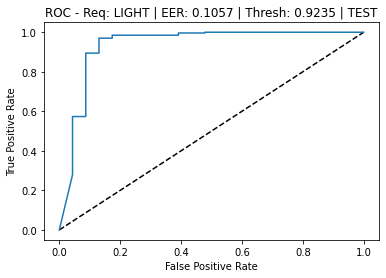

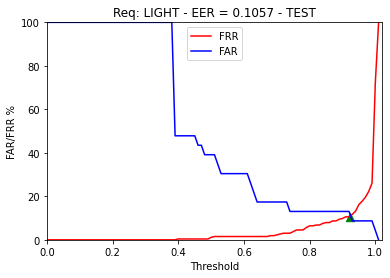

Requisite: LIGHT - EER_interp: 10.57% - Best Threshold: 0.9235484959944239
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.43      0.91      0.58        23
    COMPLIANT       0.99      0.89      0.94       265

     accuracy                           0.90       288
    macro avg       0.71      0.90      0.76       288
 weighted avg       0.95      0.90      0.91       288

Confusion matrix ----------------------------------------
FAR: 8.7% | FRR: 10.57% | EER_mean: 9.629999999999999% | TP: 237 | TN: 21 | FP: 2 | FN: 28
Accuracy ------------------------------------------------
Model Accuracy: 89.58%
---------------------------------------------------------
Requisite: SH_FACE


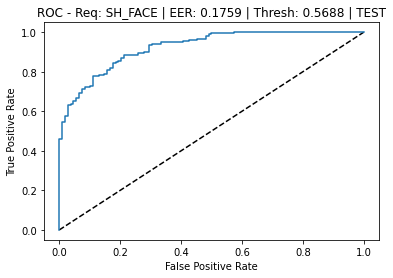

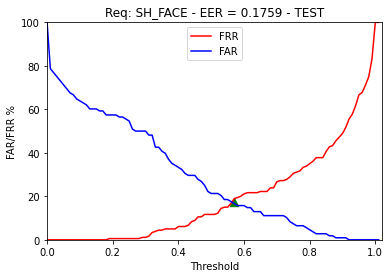

Requisite: SH_FACE - EER_interp: 17.59% - Best Threshold: 0.5688126683235851
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.73      0.82      0.77       108
    COMPLIANT       0.89      0.82      0.85       180

     accuracy                           0.82       288
    macro avg       0.81      0.82      0.81       288
 weighted avg       0.83      0.82      0.82       288

Confusion matrix ----------------------------------------
FAR: 17.59% | FRR: 18.33% | EER_mean: 17.96% | TP: 147 | TN: 89 | FP: 19 | FN: 33
Accuracy ------------------------------------------------
Model Accuracy: 81.94%
---------------------------------------------------------
Requisite: SH_HEAD


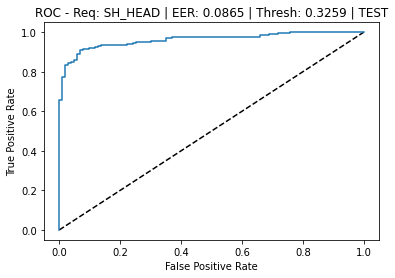

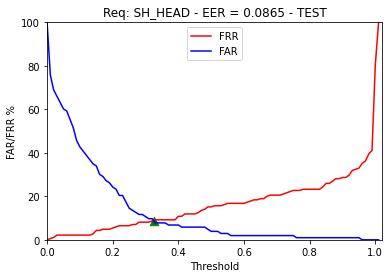

Requisite: SH_HEAD - EER_interp: 8.649999999999999% - Best Threshold: 0.3259252841408188
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.92      0.89       103
    COMPLIANT       0.95      0.91      0.93       185

     accuracy                           0.92       288
    macro avg       0.91      0.92      0.91       288
 weighted avg       0.92      0.92      0.92       288

Confusion matrix ----------------------------------------
FAR: 7.7700000000000005% | FRR: 8.649999999999999% | EER_mean: 8.21% | TP: 169 | TN: 95 | FP: 8 | FN: 16
Accuracy ------------------------------------------------
Model Accuracy: 91.67%
---------------------------------------------------------
Requisite: BLURRED


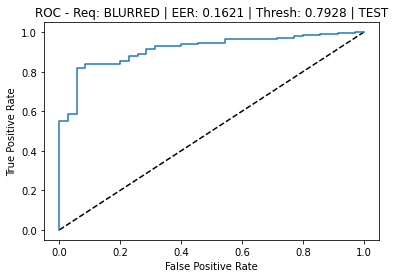

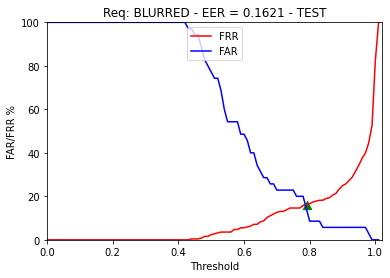

Requisite: BLURRED - EER_interp: 16.21% - Best Threshold: 0.7927567633715543
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.44      0.91      0.59        35
    COMPLIANT       0.99      0.84      0.91       253

     accuracy                           0.85       288
    macro avg       0.71      0.88      0.75       288
 weighted avg       0.92      0.85      0.87       288

Confusion matrix ----------------------------------------
FAR: 8.57% | FRR: 16.21% | EER_mean: 12.389999999999999% | TP: 212 | TN: 32 | FP: 3 | FN: 41
Accuracy ------------------------------------------------
Model Accuracy: 84.72%
---------------------------------------------------------
Requisite: SKIN_TONE


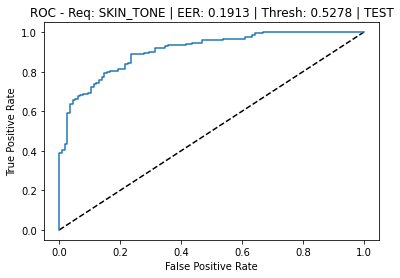

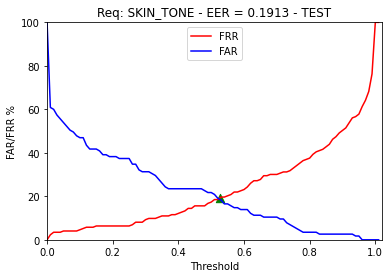

Requisite: SKIN_TONE - EER_interp: 19.13% - Best Threshold: 0.5277916789062331
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.73      0.81      0.77       115
    COMPLIANT       0.86      0.80      0.83       173

     accuracy                           0.81       288
    macro avg       0.80      0.81      0.80       288
 weighted avg       0.81      0.81      0.81       288

Confusion matrix ----------------------------------------
FAR: 19.13% | FRR: 19.650000000000002% | EER_mean: 19.39% | TP: 139 | TN: 93 | FP: 22 | FN: 34
Accuracy ------------------------------------------------
Model Accuracy: 80.56%
---------------------------------------------------------
Requisite: WASHED_OUT


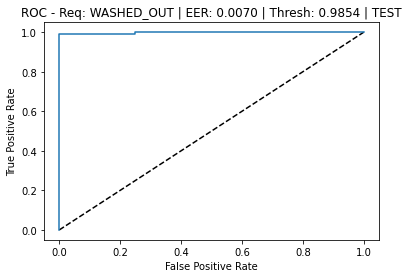

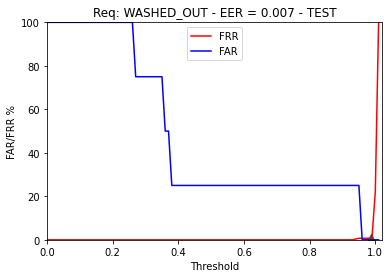

Requisite: WASHED_OUT - EER_interp: 0.7000000000000001% - Best Threshold: 0.9853772747684534
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.67      1.00      0.80         4
    COMPLIANT       1.00      0.99      1.00       284

     accuracy                           0.99       288
    macro avg       0.83      1.00      0.90       288
 weighted avg       1.00      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.7000000000000001% | EER_mean: 0.35000000000000003% | TP: 282 | TN: 4 | FP: 0 | FN: 2
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Requisite: PIXELATION


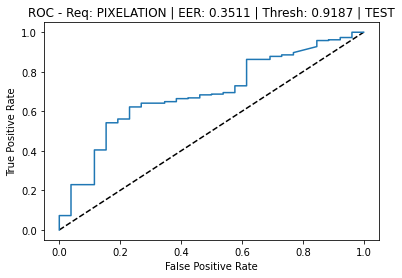

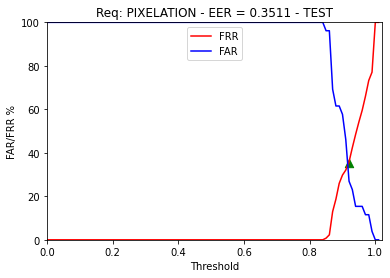

Requisite: PIXELATION - EER_interp: 35.11% - Best Threshold: 0.9186742264805859
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.16      0.65      0.25        26
    COMPLIANT       0.95      0.65      0.77       262

     accuracy                           0.65       288
    macro avg       0.55      0.65      0.51       288
 weighted avg       0.88      0.65      0.72       288

Confusion matrix ----------------------------------------
FAR: 34.62% | FRR: 35.11% | EER_mean: 34.86% | TP: 170 | TN: 17 | FP: 9 | FN: 92
Accuracy ------------------------------------------------
Model Accuracy: 64.92999999999999%
---------------------------------------------------------
Requisite: HAIR_EYES


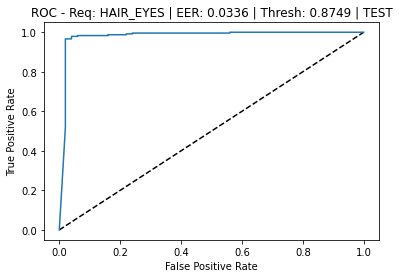

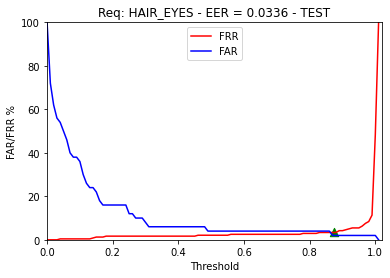

Requisite: HAIR_EYES - EER_interp: 3.36% - Best Threshold: 0.8749285395405874
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.98      0.92        50
    COMPLIANT       1.00      0.97      0.98       238

     accuracy                           0.97       288
    macro avg       0.93      0.97      0.95       288
 weighted avg       0.97      0.97      0.97       288

Confusion matrix ----------------------------------------
FAR: 2.0% | FRR: 3.36% | EER_mean: 2.68% | TP: 230 | TN: 49 | FP: 1 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 96.88%
---------------------------------------------------------
Requisite: BACKGROUND


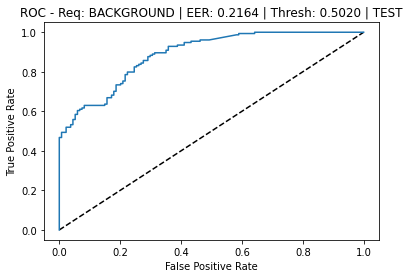

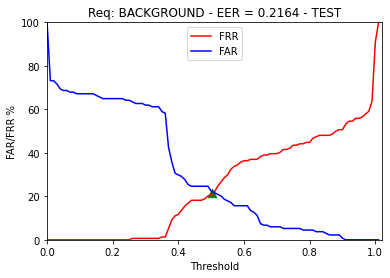

Requisite: BACKGROUND - EER_interp: 21.64% - Best Threshold: 0.5019632577895501
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.76      0.78      0.77       134
    COMPLIANT       0.81      0.79      0.80       154

     accuracy                           0.78       288
    macro avg       0.78      0.78      0.78       288
 weighted avg       0.79      0.78      0.78       288

Confusion matrix ----------------------------------------
FAR: 21.64% | FRR: 21.43% | EER_mean: 21.54% | TP: 121 | TN: 105 | FP: 29 | FN: 33
Accuracy ------------------------------------------------
Model Accuracy: 78.47%
---------------------------------------------------------
Requisite: RED_EYES


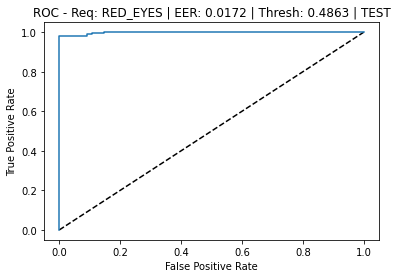

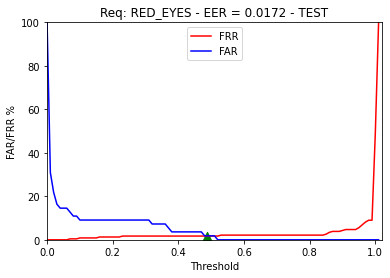

Requisite: RED_EYES - EER_interp: 1.72% - Best Threshold: 0.4862628517754157
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.93      0.98      0.96        55
    COMPLIANT       1.00      0.98      0.99       233

     accuracy                           0.98       288
    macro avg       0.96      0.98      0.97       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 1.72% | EER_mean: 1.77% | TP: 229 | TN: 54 | FP: 1 | FN: 4
Accuracy ------------------------------------------------
Model Accuracy: 98.26%
---------------------------------------------------------


In [21]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [22]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune


Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
